## Irisデータ 線形分類

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets 
import tensorflow as tf

sess = tf.Session()

## irisデータのロード(irisデータ Setosa:label=0の予測)
iris = datasets.load_iris()
binary_target = np.array([1. if x==0 else 0. for x in iris.target])
# iris.data = [(がく片の長さ、がく片の幅、花びらの長さ、花びらの幅)] 
iris_2d = np.array([[x[2], x[3]] for x in iris.data])

## batchサイズ, プレースホルダ, batchサイズは変動するのでNone
batchsize=20
x1_data = tf.placeholder(shape=[None, 1], dtype=tf.float32) 
x2_data = tf.placeholder(shape=[None, 1], dtype=tf.float32) 
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1, 1]))
b = tf.Variable(tf.random_normal(shape=[1, 1]))

## 線形モデル定義 xl = x2 * A + b
my_mult = tf.matmul(x2_data, A)
my_add = tf.add(my_mult, b)
my_output = tf.subtract(x1_data, my_add)

## 損失関数(シグモイド交差エントロピー)
xentropy = tf.nn.sigmoid_cross_entropy_with_logits(logits=my_output, labels=y_target)

## 最適化アルゴリズムの設定(学習率 0.05)
my_opt = tf.train.GradientDescentOptimizer(0.05)
train_step = my_opt.minimize(xentropy)

## 変数初期化演算
init = tf.global_variables_initializer()
sess.run(init)

/Users/daisuke/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)
/Users/daisuke/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
epoch = 1000


for i in range(epoch):
    rand_index = np.random.choice(len(iris_2d), size = batchsize)
    rand_x = iris_2d[rand_index]
    rand_xl = np.array([[x[0]] for x in rand_x])
    rand_x2 = np.array([[x[1]] for x in rand_x])
    rand_y = np.array([[y] for y in binary_target[rand_index]]) 
    sess.run(train_step, feed_dict={x1_data: rand_xl, x2_data: rand_x2, y_target: rand_y})
    if (i + 1) % 200 == 0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ', b = ' + str(sess.run(b)))

Step #200 A = [[8.592396]], b = [[-3.443024]]
Step #400 A = [[10.129572]], b = [[-4.5927086]]
Step #600 A = [[11.071627]], b = [[-5.359834]]
Step #800 A = [[11.834188]], b = [[-5.881219]]
Step #1000 A = [[12.358748]], b = [[-6.3460903]]


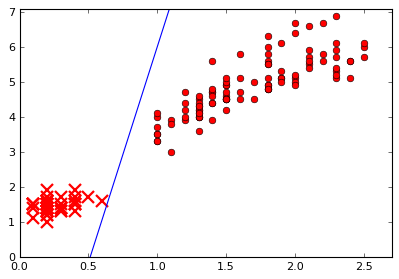

In [3]:
#係数を抽出
[[slope]] = sess.run(A) 
[[intercept]] = sess.run(b)

#適合する直線を作成
x = np.linspace(0, 3, num=50)
ablineValues = []
for i in x:
    ablineValues.append(slope*i+intercept)
    
setosa_x = [a[1] for i, a in enumerate(iris_2d) if binary_target[i] == 1]
setosa_y = [a[0] for i, a in enumerate(iris_2d) if binary_target[i] == 1]
non_setosa_x = [a[1] for i, a in enumerate(iris_2d) if binary_target[i] == 0]
non_setosa_y = [a[0] for i, a in enumerate(iris_2d) if binary_target[i] == 0]

plt.plot(setosa_x, setosa_y, 'rx', ms=10, mew=2, label='setosa')
plt.plot(non_setosa_x, non_setosa_y, 'ro', label='Non_setosa')
plt.plot(x, ablineValues, 'b-')
plt.xlim([0.0, 2.7])
plt.ylim([0.0, 7.1])

plt.show()

## MNIST 分類

In [1]:
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.examples.tutorials.mnist import input_data

sess = tf.Session()

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

## 画像のサンプリング
np.random.seed(13)
train_size = 1000
test_size = 102
rand_train_indices = np.random.choice(len(mnist.train.images), train_size, replace = False)
rand_test_indices = np.random.choice(len(mnist.test.images), test_size, replace = False)

x_vals_train = mnist.train.images[rand_train_indices]
x_vals_test = mnist.test.images[rand_test_indices]
y_vals_train = mnist.train.labels[rand_train_indices]
y_vals_test = mnist.test.labels[rand_test_indices]

## バッチサイズ
batch_size = 6

## プレースホルダの設定
# x_data_train = tf.placeholder(shape=[None, 784], dtype=tf.float32)
# x_data_test = tf.placeholder(shape=[None, 784], dtype=tf.float32)
# y_target_train = tf.placeholder(shape=[None, 10], dtype=tf.float32)
# y_target_test = tf.placeholder(shape=[None, 10], dtype=tf.float32)
x_data = tf.placeholder(shape=[None, 784], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 10], dtype=tf.float32)

/Users/daisuke/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)
/Users/daisuke/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
def normalize_cols(m):
    col_max = m.max(axis=0)
    col_min = m.min(axis=0)
    return (m - col_min) / (col_max - col_min)

In [3]:
def init_weight(shape, st_dev):
    return tf.Variable(tf.random_normal(shape, stddev = st_dev))

def init_bias(shape, st_dev):
    return tf.Variable(tf.random_normal(shape, stddev = st_dev))

## 全結合層の計算定義
def fully_connected(input_layer, weights, biases):
    layer = tf.add(tf.matmul(input_layer, weights), biases) 
    return tf.nn.relu(layer)

In [23]:
# 1層目
weight_1 = init_weight(shape=[784, 300], st_dev=10.0)
bias_1 = init_bias(shape=[300], st_dev=10.0)
layer_1 = fully_connected(x_data, weight_1, bias_1)

# 2層目
weight_2 = init_weight(shape=[300, 100], st_dev=10.0)
bias_2 = init_bias(shape=[100], st_dev=10.0)
layer_2 = fully_connected(layer_1, weight_2, bias_2)

# 3層目
# weight_3 = init_weight(shape=[100, 100], st_dev=10.0)
# bias_3 = init_bias(shape=[100], st_dev=10.0)
# layer_3 = fully_connected(x_data_train, weight_3, bias_3)

# 出力層
weight_out = init_weight(shape=[100, 10], st_dev=10.0)
bias_out = init_bias(shape=[10], st_dev=10.0)
final_output = fully_connected(layer_2, weight_out, bias_out)

#損失関数を作成
loss = tf.reduce_mean(tf.abs(y_target - final_output))
#最適化関数を作成
my_opt = tf.train.AdamOptimizer(0.05) 
train_step = my_opt.minimize(loss)
#変数を初期化
init = tf.global_variables_initializer()
sess.run(init)

In [24]:
loss_vec = []
test_loss = []
# num_loops = int(np.ceil(len(x_vals_train)/batch_size))
num_loops = 20

for i in range(num_loops):
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = x_vals_train[rand_index]
    rand_y = y_vals_train[rand_index]
#     print(rand_x.shape)
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})

    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss)
    
    test_temp_loss = sess.run(loss, feed_dict={x_data: x_vals_test, y_target: y_vals_test})
    test_loss.append(test_temp_loss)
    
    if (i+1)%1 == 0:
        print('Generation: ' + str(i+1) + '. Loss = ' + str(temp_loss))

Generation: 1. Loss = 190880.17
Generation: 2. Loss = 100273.664
Generation: 3. Loss = 76341.125
Generation: 4. Loss = 51827.273
Generation: 5. Loss = 20662.299
Generation: 6. Loss = 9753.708
Generation: 7. Loss = 8251.826
Generation: 8. Loss = 5981.3936
Generation: 9. Loss = 0.1
Generation: 10. Loss = 2718.9573
Generation: 11. Loss = 3117.024
Generation: 12. Loss = 66.159904
Generation: 13. Loss = 0.1
Generation: 14. Loss = 12626.432
Generation: 15. Loss = 0.1
Generation: 16. Loss = 0.1
Generation: 17. Loss = 0.1
Generation: 18. Loss = 0.1
Generation: 19. Loss = 0.1
Generation: 20. Loss = 0.1


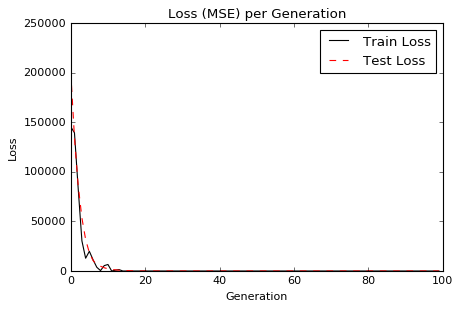

In [143]:
import matplotlib.pyplot as plt
plt.plot(loss_vec, 'k-', label='Train Loss') 
plt.plot(test_loss, 'r--', label='Test Loss') 
plt.title('Loss (MSE) per Generation') 
plt.xlabel('Generation')
plt.ylabel('Loss') 
plt.legend(loc='upper right') 
plt.show()